In [68]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
names = ['1', '2', '3', '4', '5', '6']
labels = [r'\ln \lambda_0', r'\mu_z', r'\mu_m', r'\sigma_{\ln \lambda, 0}', r'\sigma_z', r'\sigma_m']
#labels = [r'\ln \lambda_0', r'\mu_m', r'\sigma_{\ln \lambda, 0}',r'\sigma_m']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':3, 'smooth_scale_1D':3, 'boundary_correction_order':0}

In [111]:
n_cut=15000
name='1-halo=nfw+c-M=Diemer15_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/M/MCMC_fit_m-r_M_{name}.pkl', allow_pickle = True)
M = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing masses alone')
t = np.load('../chains/N/MCMC_fit_m-r_N__hmf=Despali16.pkl', allow_pickle = True)
N = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Abundance alone')
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxN = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing masses + Abundance')
t = np.load(f'../chains/WL/MCMC_fit_m-r_WL_{name}.pkl', allow_pickle = True)
WL = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing profiles alone')
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing profiles + Abundance')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


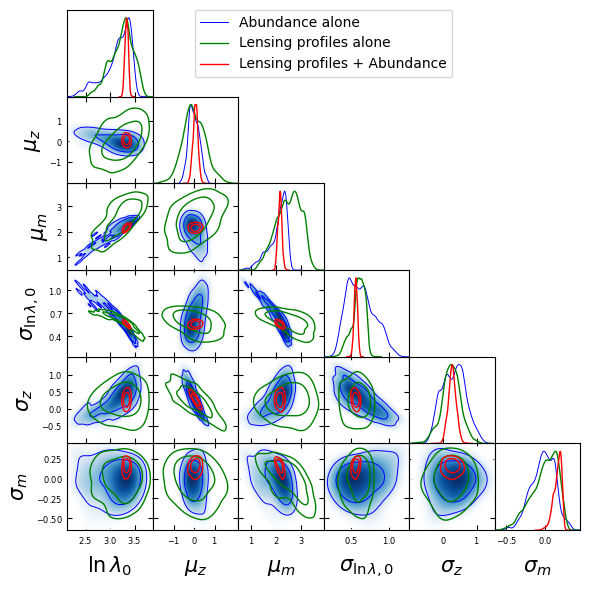

In [125]:
g = plots.get_subplot_plotter(subplot_size=1.)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
range_ = {'4':[0.4,0.8],}
g.triangle_plot(
    [N,  WL,WLxN,], 
                filled=[False, False, False, True, True], 
                contour_colors = ['b', 'g', 'r', 'g', 'r', 'k' ], 
                contour_ls=['-','-','-', '-', '-'],
                contour_lws=[.7,1,1,.5,.5],shaded=True,
                legend_fontsize = 10,
               # param_limits=range_,
                fine_bins = 1,  marker_args = {'linewidth':10}, )
plt.savefig(f'../fig/mcmc_scaling_relation_{name}.png', dpi = 300)